# Convolução 

Neste notebook irei demonstrar o que é uma convolução e sua aplicação em funções simples. Este notebook servirá de base para a construção de uma modelagem 1D de um dado de poço para a geração de um traço sísmico sintético.   

## O que é uma convolução?

**Definição 1**: Dadas duas funções $f: \mathbb{R} \rightarrow \mathbb{R}$ e $g: \mathbb{R} \rightarrow \mathbb{R}$, definimos como seu produto de convolução pela expressão

$$f(t) \ast g(t)= \int_{-\infty}^{+\infty } f(t)g(t - \tau) d\tau. $$

Esta é uma operação matemática entre duas funções que consiste em determinar como uma função modifica o formato da outra a partir deste produto. Em termos práticos, isto é aplicada como um determinado sistema responde a um dado pulso.


**Definição 2**: A transformada de Fourier discreta de um produto de convolução entre duas funções $f(t)$ e $g(t)$ pode ser definida como

$$ \mathcal{F}[f(t) \ast g(t)] = \sqrt{2 \pi} \mathcal{F}[f(t)] \mathcal{F}[g(t)]. $$

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A Wavelet de Ricker

Uma Wavelet de Ricker pode ser definida como:

$$ f(t) = A(1 - 2\pi^2 f^2 t^2 ) e^{- \pi^2 f^2 t^2}$$

In [2]:
def ricker_wavelet(f, length, dt, A = 1.0):
    t = np.linspace(-length / 2, (length-dt) / 2, int(length / dt))
    y = A*(1. - 2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

In [13]:
tw, w = ricker_wavelet(10,0.512,0.001)

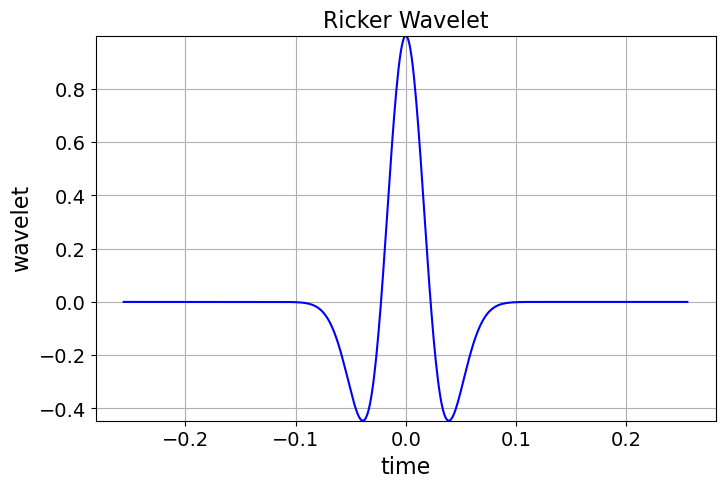

In [14]:
plt.figure(figsize=(8,5))
plt.title('Ricker Wavelet',fontsize=16)
plt.plot(tw,w,'b-')
plt.ylim(np.min(w),np.max(w))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('time',fontsize=16)
plt.ylabel('wavelet',fontsize=16)
plt.grid()
plt.show()

## Gerando uma função resposta

In [15]:
dt = 0.001

In [16]:
t = np.linspace(0.,2., num = int(2/dt))

In [17]:
x = np.zeros_like(t)
x[200] += -1.
x[700] += 1.
x[1500] += -0.5
x[1550] += 0.5

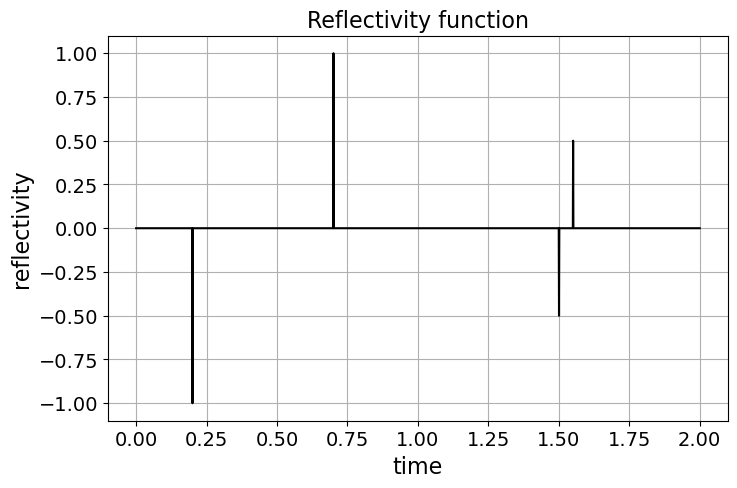

In [18]:
plt.figure(figsize=(8,5))
plt.title('Reflectivity function',fontsize=16)
plt.plot(t,x,'k-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('reflectivity',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.grid()

plt.show()

## Realizando a convolução

In [19]:
trace = np.convolve(x,w,mode='same')

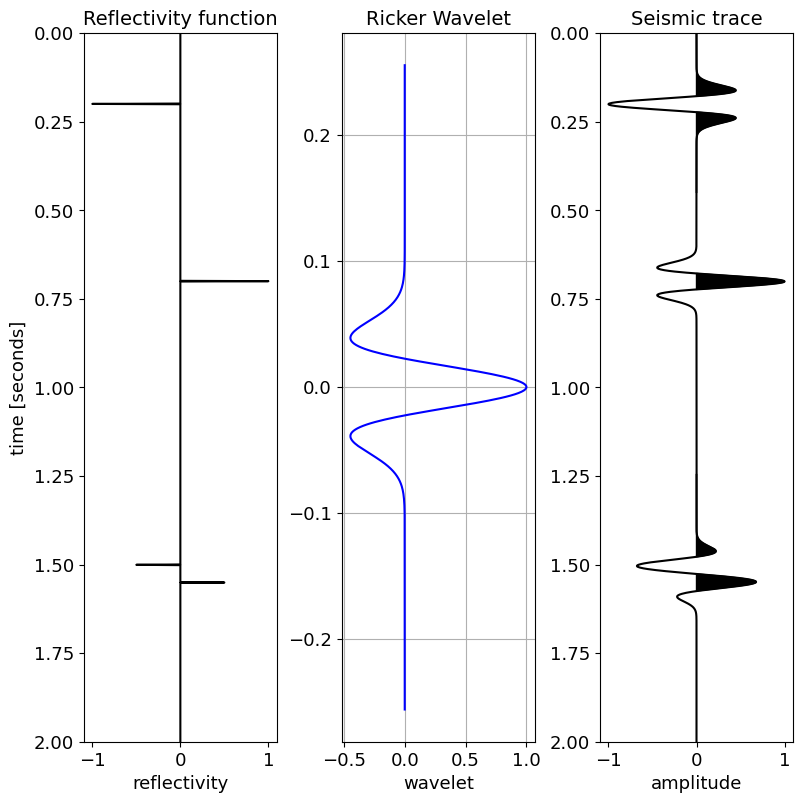

In [20]:
plt.figure(figsize=(8,8))
title_font = 14
bottom_font = 13
plt.subplot(131)
plt.title('Reflectivity function',fontsize=title_font)
plt.plot(x,t,'k-')
plt.ylim(np.max(t),np.min(t))
plt.xticks(fontsize=bottom_font)
plt.yticks(fontsize=bottom_font)
plt.xlabel('reflectivity',fontsize=bottom_font)
plt.ylabel('time [seconds]',fontsize=bottom_font)

plt.subplot(132)
plt.title('Ricker Wavelet',fontsize=title_font)
plt.plot(w,tw,'b-')
plt.xticks(fontsize=bottom_font)
plt.yticks(fontsize=bottom_font)
plt.xlabel('wavelet',fontsize=bottom_font)
plt.grid()

plt.subplot(133)
plt.title('Seismic trace',fontsize=title_font)
plt.plot(trace,t,'k-')
plt.fill_betweenx(t, 0.0, trace, where=trace > 0.0, interpolate=True, color="k")
plt.xticks(fontsize=bottom_font)
plt.yticks(fontsize=bottom_font)
plt.ylim(np.max(t),np.min(t))
plt.xlabel('amplitude',fontsize=bottom_font)

plt.tight_layout(pad=0.6)

fname='images/convolution'
plt.savefig(fname+'.png',dpi=200)
plt.show()